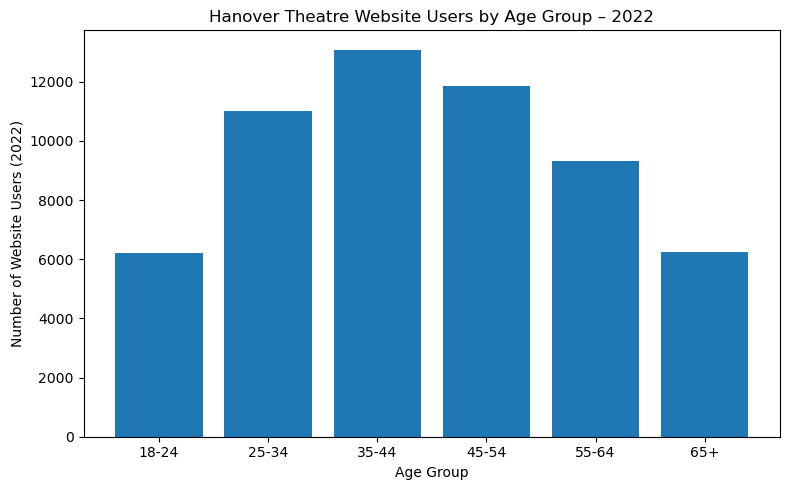

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Data from "Analytics thehanovertheatre.org Demographics Age 20220101-20221102.pdf"
age_data = {
    "Age Group": ["18-24", "25-34", "35-44", "45-54", "55-64", "65+"],
    "Users":     [6194,    11006,    13082,    11855,    9310,     6260]  # from PDF
}

age_df = pd.DataFrame(age_data)
age_df = age_df.sort_values("Age Group")

plt.figure(figsize=(8,5))
plt.bar(age_df["Age Group"], age_df["Users"])
plt.xlabel("Age Group")
plt.ylabel("Number of Website Users (2022)")
plt.title("Hanover Theatre Website Users by Age Group – 2022")
plt.tight_layout()
plt.show()


<>:5: SyntaxWarning: invalid escape sequence '\D'
<>:5: SyntaxWarning: invalid escape sequence '\D'
C:\Users\karth\AppData\Local\Temp\ipykernel_876\3956009678.py:5: SyntaxWarning: invalid escape sequence '\D'
  email_df = pd.read_excel("C:\D Drive\Studies\Sem 4\Market Research and Analysis\Week 8\ACC 2022 Email Data.xlsx", sheet_name="EmailTracking")


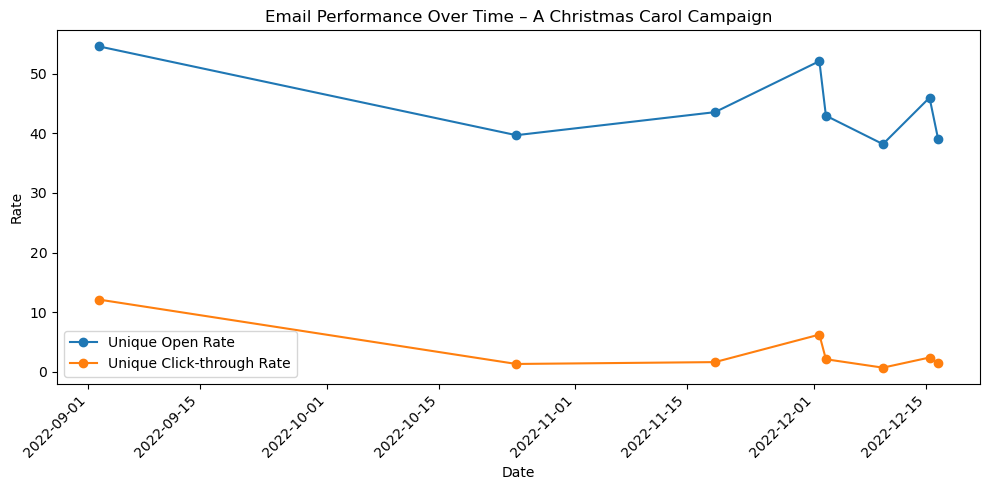

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Load email tracking data
email_df = pd.read_excel("C:\D Drive\Studies\Sem 4\Market Research and Analysis\Week 8\ACC 2022 Email Data.xlsx", sheet_name="EmailTracking")

# Keep rows that are clearly about A Christmas Carol (you can tweak the filter)
mask = email_df["Topic Included"].fillna("").str.contains("Christmas Carol", case=False) | \
       email_df["Subject"].fillna("").str.contains("Christmas Carol|ACC", case=False)

acc_emails = email_df[mask].copy()

# Parse dates
acc_emails["Date"] = pd.to_datetime(acc_emails["Date Created (US/Eastern)"])

# Sort by date
acc_emails = acc_emails.sort_values("Date")

# Plot Unique Open Rate and Unique Click-through Rate over time
plt.figure(figsize=(10,5))
plt.plot(acc_emails["Date"], acc_emails["Unique Open Rate"], marker="o", label="Unique Open Rate")
plt.plot(acc_emails["Date"], acc_emails["Unique Click-through Rate"], marker="o", label="Unique Click-through Rate")

plt.xlabel("Date")
plt.ylabel("Rate")
plt.title("Email Performance Over Time – A Christmas Carol Campaign")
plt.legend()
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


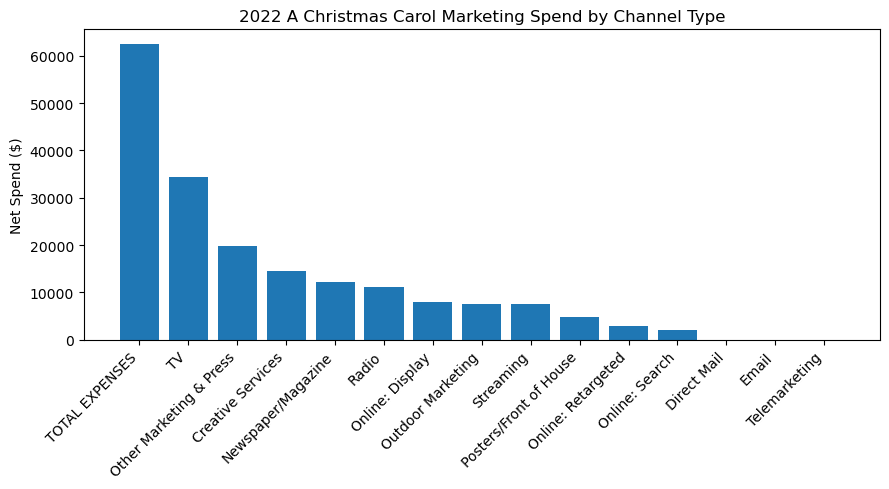

In [24]:
plan22 = pd.read_excel("C:\\D Drive\\Studies\\Sem 4\\Market Research and Analysis\\Week 8\\2022 Marketing Plan for A Christmas Carol.xlsx",
                       sheet_name="A Christmas Carol 12_17_22-12_2")

# Keep only rows that actually have a Type and Net spend
spend = plan22.dropna(subset=["Type", "Net"])

# Group by type (e.g., Social, Radio, Newspaper, Digital, etc.)
type_spend = spend.groupby("Type")["Net"].sum().sort_values(ascending=False)

plt.figure(figsize=(9,5))
plt.bar(type_spend.index.astype(str), type_spend.values)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Net Spend ($)")
plt.title("2022 A Christmas Carol Marketing Spend by Channel Type")
plt.tight_layout()
plt.show()


In [25]:
import pandas as pd
import matplotlib.pyplot as plt

by_postcard = pd.read_csv("C:\\D Drive\\Studies\\Sem 4\\Market Research and Analysis\\Week 8\\2324 Christmas Carol by Solicited by Post Card.csv")

summary = by_postcard.agg(
    total_revenue=("SUM Order Admission Net", "sum"),
    tickets=("COUNT Order Admission ID", "sum"),
    unique_customers=("Customer Number", "nunique")
)

print(summary)


                  SUM Order Admission Net  COUNT Order Admission ID  \
total_revenue                     12221.6                       NaN   
tickets                               NaN                     261.0   
unique_customers                      NaN                       NaN   

                  Customer Number  
total_revenue                 NaN  
tickets                       NaN  
unique_customers             72.0  


                 total_revenue  tickets
Price Type Name                        
Adult                   8499.0      164
Cast50%Off              1410.0       50
Subscriber               690.3       13
Member                   511.0        9
FSS Member               472.0        8
Employee                 370.8        8
FEZZIWIG                 156.0        4
CHORUS                    98.0        4
V - BOGO                  14.5        1


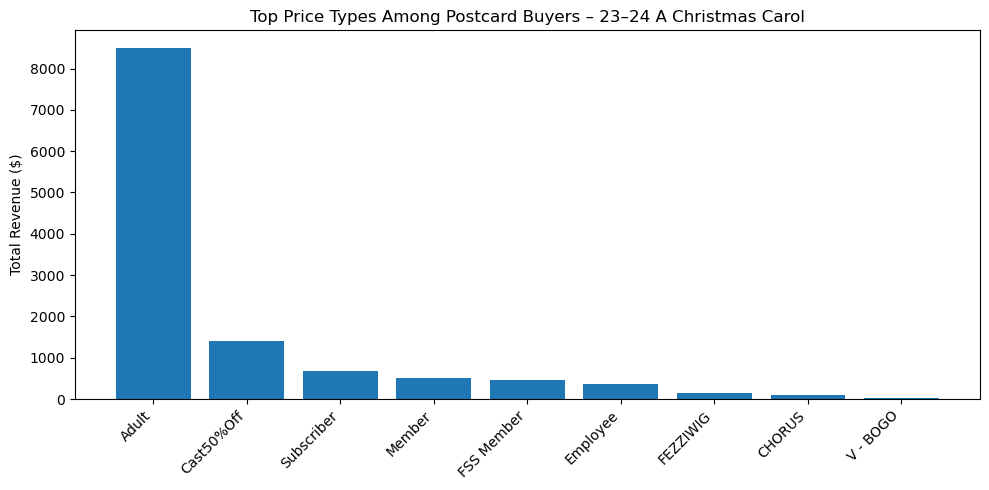

In [26]:
pt_summary = by_postcard.groupby("Price Type Name").agg(
    total_revenue=("SUM Order Admission Net", "sum"),
    tickets=("COUNT Order Admission ID", "sum")
).sort_values("total_revenue", ascending=False)

print(pt_summary.head(10))   # see top 10 price types

# Bar chart of top 10 price types by revenue
top = pt_summary.head(10)

plt.figure(figsize=(10,5))
plt.bar(top.index.astype(str), top["total_revenue"])
plt.xticks(rotation=45, ha="right")
plt.ylabel("Total Revenue ($)")
plt.title("Top Price Types Among Postcard Buyers – 23–24 A Christmas Carol")
plt.tight_layout()
plt.show()


In [27]:
import pandas as pd

seats = pd.read_csv("C:\\D Drive\\Studies\\Sem 4\\Market Research and Analysis\\Week 8\\2324 Christmas Carol Seats per Performance by Ticket Buyer.csv")
print(seats.columns)


Index(['Order Number', 'Order Active Date', 'Customer Number',
       'Contact Last Name', 'Contact First Name', 'Event Code',
       'Price Type Name', 'Order Admission Promotion Access Code',
       'SUM Order Admission Amount', 'SUM Order Admission Net',
       'SUM Order Admission Net Paid', 'COUNT Seat'],
      dtype='object')


             total_revenue  tickets
Event Code                         
ACC 122322E       53491.80     1619
ACC 122222E       44605.05     1611
ACC 121822M       59144.20     1484
ACC 121722E       50352.95     1478
ACC 121722M       61295.95     1478


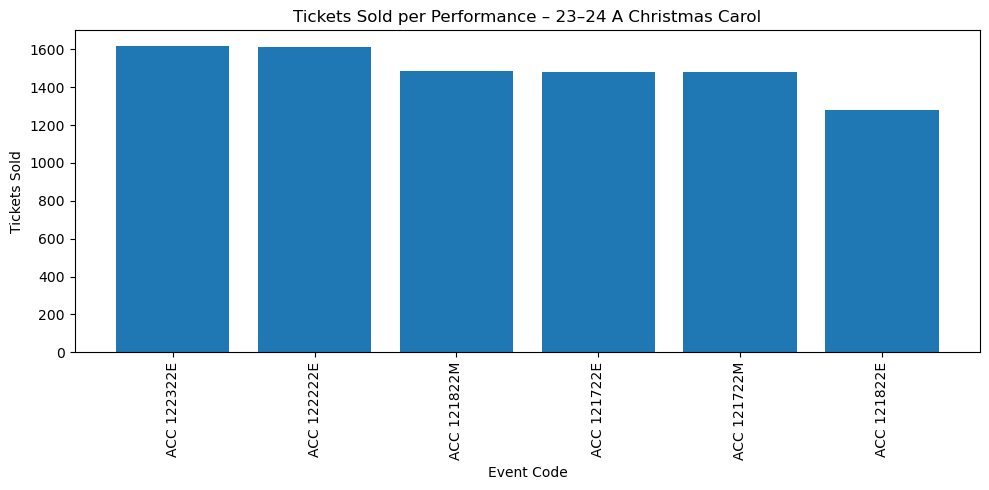

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

seats = pd.read_csv(
    r"C:\D Drive\Studies\Sem 4\Market Research and Analysis\Week 8\2324 Christmas Carol Seats per Performance by Ticket Buyer.csv"
)

# Group by Event Code (each performance)
perf_summary = seats.groupby("Event Code").agg(
    total_revenue=("SUM Order Admission Net", "sum"),
    tickets=("COUNT Seat", "sum")
).sort_values("tickets", ascending=False)

print(perf_summary.head())  # just to see the top performances

# Bar chart – tickets per performance
plt.figure(figsize=(10, 5))
plt.bar(perf_summary.index.astype(str), perf_summary["tickets"])
plt.xticks(rotation=90)
plt.xlabel("Event Code")
plt.ylabel("Tickets Sold")
plt.title("Tickets Sold per Performance – 23–24 A Christmas Carol")
plt.tight_layout()
plt.show()


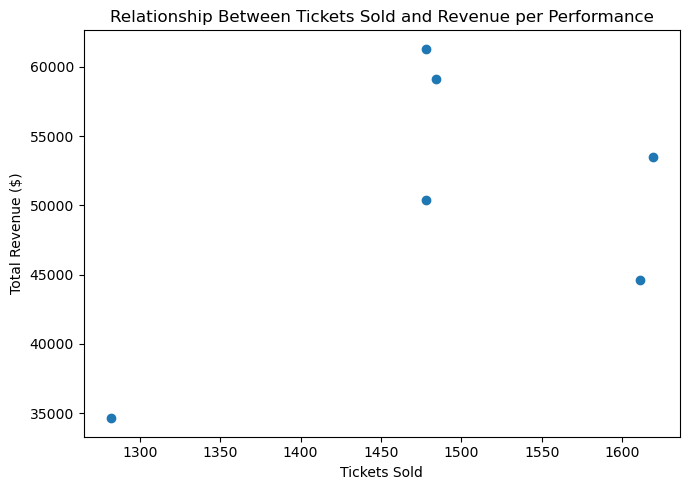

In [29]:
plt.figure(figsize=(7, 5))
plt.scatter(perf_summary["tickets"], perf_summary["total_revenue"])
plt.xlabel("Tickets Sold")
plt.ylabel("Total Revenue ($)")
plt.title("Relationship Between Tickets Sold and Revenue per Performance")
plt.tight_layout()
plt.show()


In [30]:
import pandas as pd

df = pd.read_csv("C:\D Drive\Studies\Sem 4\Market Research and Analysis\Week 10\ACC All time buyers.csv")
df.columns


<>:3: SyntaxWarning: invalid escape sequence '\D'
<>:3: SyntaxWarning: invalid escape sequence '\D'
C:\Users\karth\AppData\Local\Temp\ipykernel_876\4066969872.py:3: SyntaxWarning: invalid escape sequence '\D'
  df = pd.read_csv("C:\D Drive\Studies\Sem 4\Market Research and Analysis\Week 10\ACC All time buyers.csv")


Index(['Customer Number', 'Default First Name', 'Default Last Name',
       'Default Greeting Name', 'Default Salutation Name',
       'Customer Organization Name', 'Default Address Street1',
       'Default Address Street2', 'Default Address Street3',
       'Default Address Street4', 'Default Address City',
       'Default Address State', 'Default Address Postal/Zip Code',
       'Performance Series Name', 'Performance Code', 'Performance Start Date',
       'COUNT Order Admission ID'],
      dtype='object')

<>:4: SyntaxWarning: invalid escape sequence '\D'
<>:4: SyntaxWarning: invalid escape sequence '\D'
C:\Users\karth\AppData\Local\Temp\ipykernel_876\330493795.py:4: SyntaxWarning: invalid escape sequence '\D'
  df = pd.read_csv("C:\D Drive\Studies\Sem 4\Market Research and Analysis\Week 10\ACC All time buyers.csv")


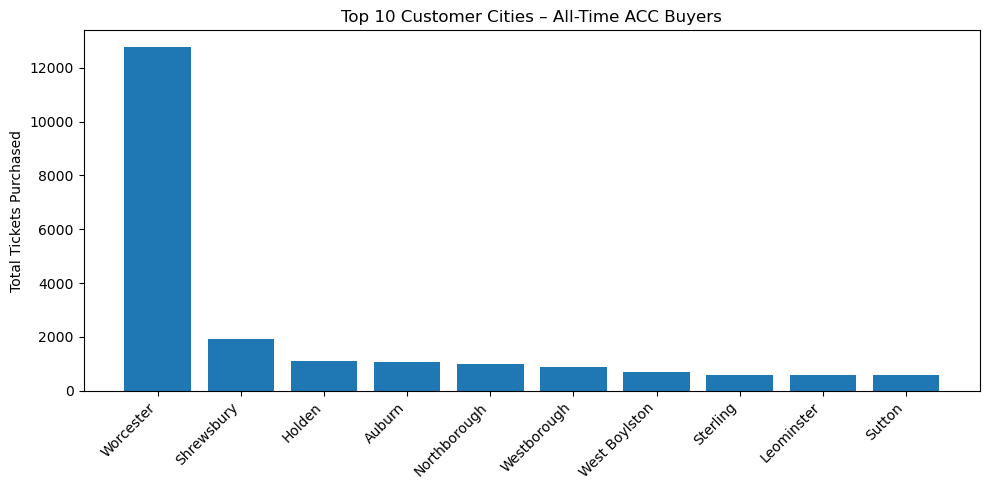

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("C:\D Drive\Studies\Sem 4\Market Research and Analysis\Week 10\ACC All time buyers.csv")

city_counts = df.groupby("Default Address City")["COUNT Order Admission ID"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
plt.bar(city_counts.index.astype(str), city_counts.values)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Total Tickets Purchased")
plt.title("Top 10 Customer Cities – All-Time ACC Buyers")
plt.tight_layout()
plt.show()


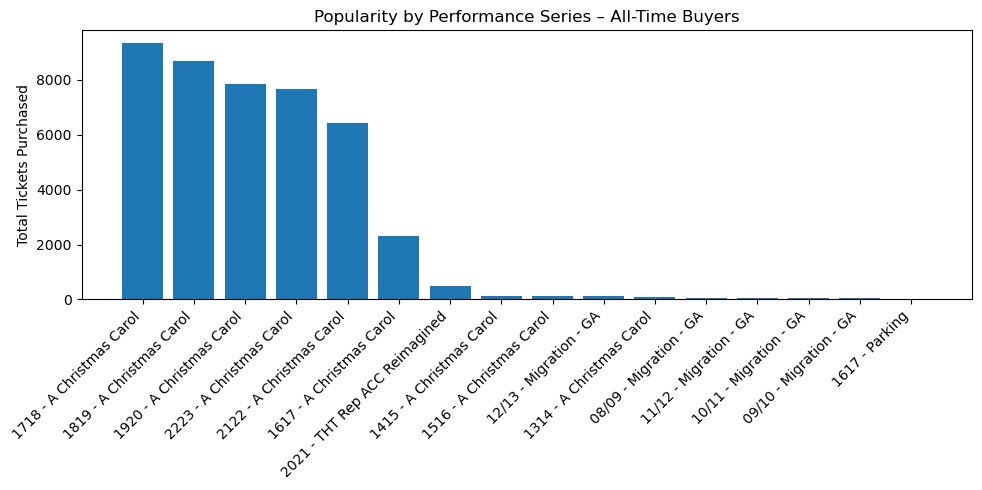

In [32]:
series_counts = df.groupby("Performance Series Name")["COUNT Order Admission ID"].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
plt.bar(series_counts.index.astype(str), series_counts.values)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Total Tickets Purchased")
plt.title("Popularity by Performance Series – All-Time Buyers")
plt.tight_layout()
plt.show()


In [33]:
import pandas as pd

df = pd.read_csv("C:\D Drive\Studies\Sem 4\Market Research and Analysis\Week 10\ACC 16 24 Buyers.csv")
df.columns


<>:3: SyntaxWarning: invalid escape sequence '\D'
<>:3: SyntaxWarning: invalid escape sequence '\D'
C:\Users\karth\AppData\Local\Temp\ipykernel_876\3676888930.py:3: SyntaxWarning: invalid escape sequence '\D'
  df = pd.read_csv("C:\D Drive\Studies\Sem 4\Market Research and Analysis\Week 10\ACC 16 24 Buyers.csv")


Index(['Cust. #', 'First Name', 'Last Name', 'Street Address', 'City', 'State',
       'Zip Code', 'Company/Org', 'Series', 'COUNT Order Admission ID',
       'SUM Order Admission Net'],
      dtype='object')

<>:4: SyntaxWarning: invalid escape sequence '\D'
<>:4: SyntaxWarning: invalid escape sequence '\D'
C:\Users\karth\AppData\Local\Temp\ipykernel_876\1271329022.py:4: SyntaxWarning: invalid escape sequence '\D'
  df = pd.read_csv("C:\D Drive\Studies\Sem 4\Market Research and Analysis\Week 10\ACC 16 24 Buyers.csv")


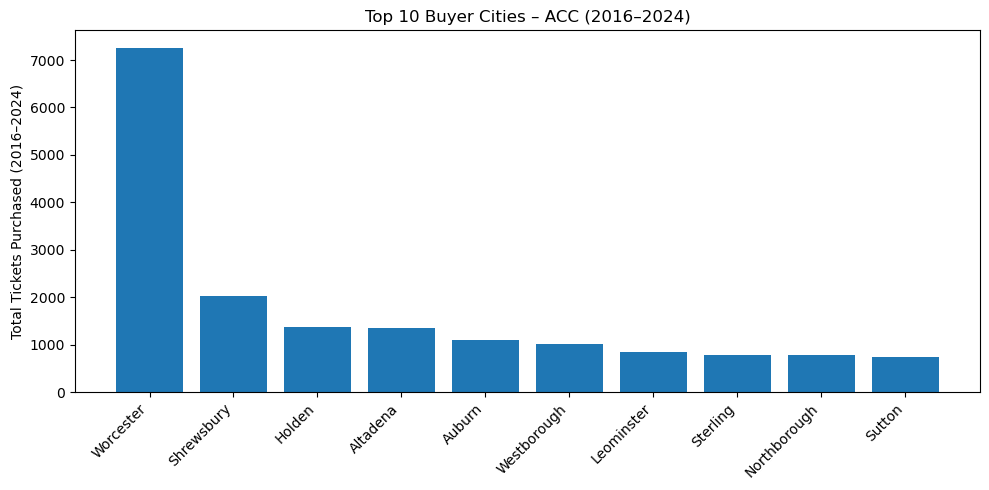

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("C:\D Drive\Studies\Sem 4\Market Research and Analysis\Week 10\ACC 16 24 Buyers.csv")

city_totals = (
    df.groupby("City")["COUNT Order Admission ID"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10,5))
plt.bar(city_totals.index.astype(str), city_totals.values)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Total Tickets Purchased (2016–2024)")
plt.title("Top 10 Buyer Cities – ACC (2016–2024)")
plt.tight_layout()
plt.show()


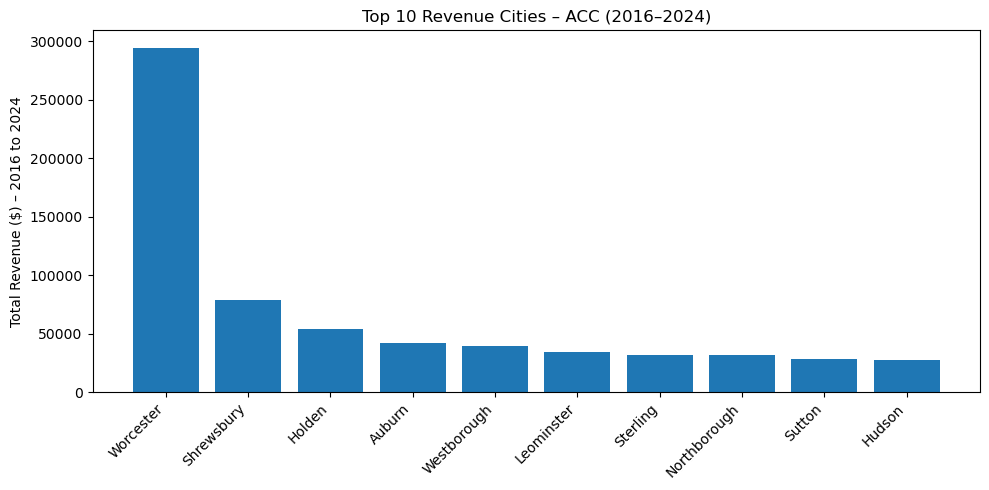

In [35]:
revenue_by_city = (
    df.groupby("City")["SUM Order Admission Net"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10,5))
plt.bar(revenue_by_city.index.astype(str), revenue_by_city.values)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Total Revenue ($) – 2016 to 2024")
plt.title("Top 10 Revenue Cities – ACC (2016–2024)")
plt.tight_layout()
plt.show()


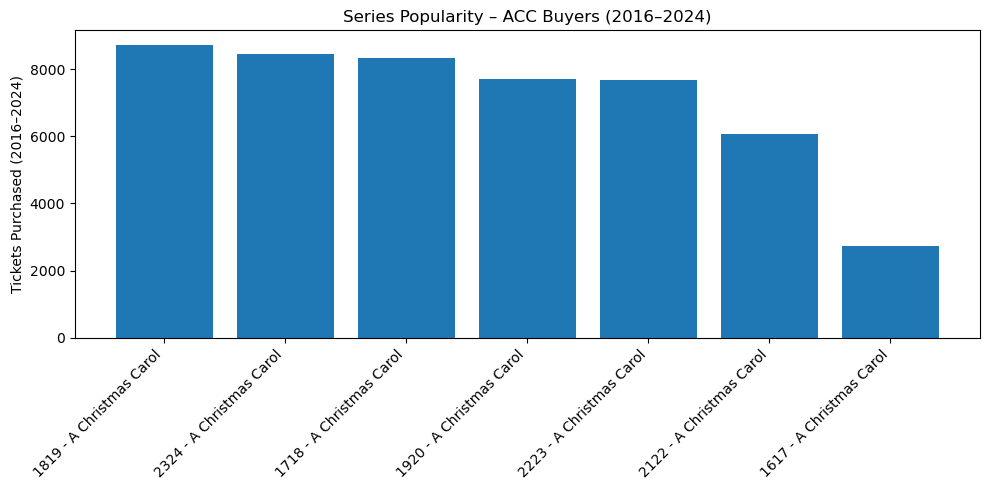

In [36]:
series_popularity = (
    df.groupby("Series")["COUNT Order Admission ID"]
    .sum()
    .sort_values(ascending=False)
)

plt.figure(figsize=(10,5))
plt.bar(series_popularity.index.astype(str), series_popularity.values)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Tickets Purchased (2016–2024)")
plt.title("Series Popularity – ACC Buyers (2016–2024)")
plt.tight_layout()
plt.show()


In [37]:
import pandas as pd

df = pd.read_csv("C:\D Drive\Studies\Sem 4\Market Research and Analysis\Week 10\Holiday Shows by City.csv")
df.columns


<>:3: SyntaxWarning: invalid escape sequence '\D'
<>:3: SyntaxWarning: invalid escape sequence '\D'
C:\Users\karth\AppData\Local\Temp\ipykernel_876\956230150.py:3: SyntaxWarning: invalid escape sequence '\D'
  df = pd.read_csv("C:\D Drive\Studies\Sem 4\Market Research and Analysis\Week 10\Holiday Shows by City.csv")


Index(['City', 'Tickets', 'Revenue'], dtype='object')

<>:4: SyntaxWarning: invalid escape sequence '\D'
<>:4: SyntaxWarning: invalid escape sequence '\D'
C:\Users\karth\AppData\Local\Temp\ipykernel_876\1918671039.py:4: SyntaxWarning: invalid escape sequence '\D'
  holiday = pd.read_csv("C:\D Drive\Studies\Sem 4\Market Research and Analysis\Week 10\Holiday Shows by City.csv")


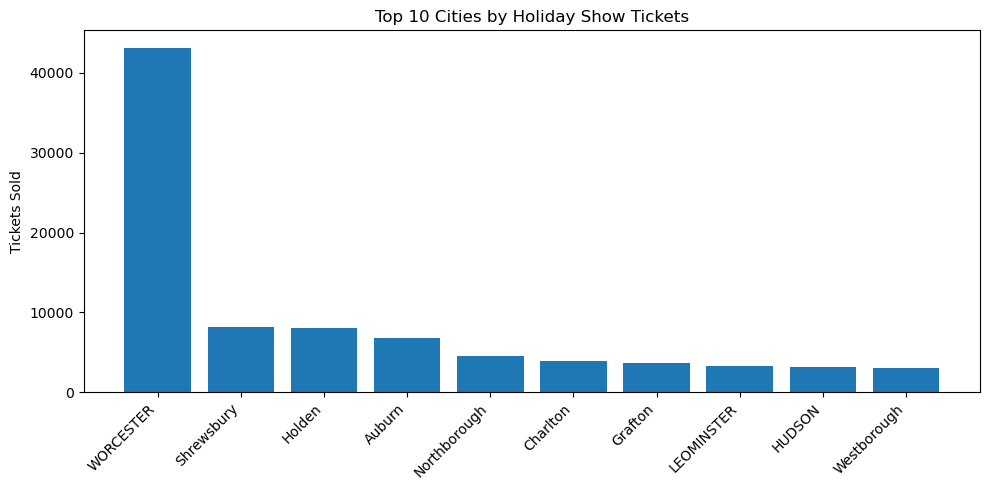

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

holiday = pd.read_csv("C:\D Drive\Studies\Sem 4\Market Research and Analysis\Week 10\Holiday Shows by City.csv")

# Top 10 cities by tickets
top_tickets = (
    holiday.groupby("City")["Tickets"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10,5))
plt.bar(top_tickets.index.astype(str), top_tickets.values)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Tickets Sold")
plt.title("Top 10 Cities by Holiday Show Tickets")
plt.tight_layout()
plt.show()


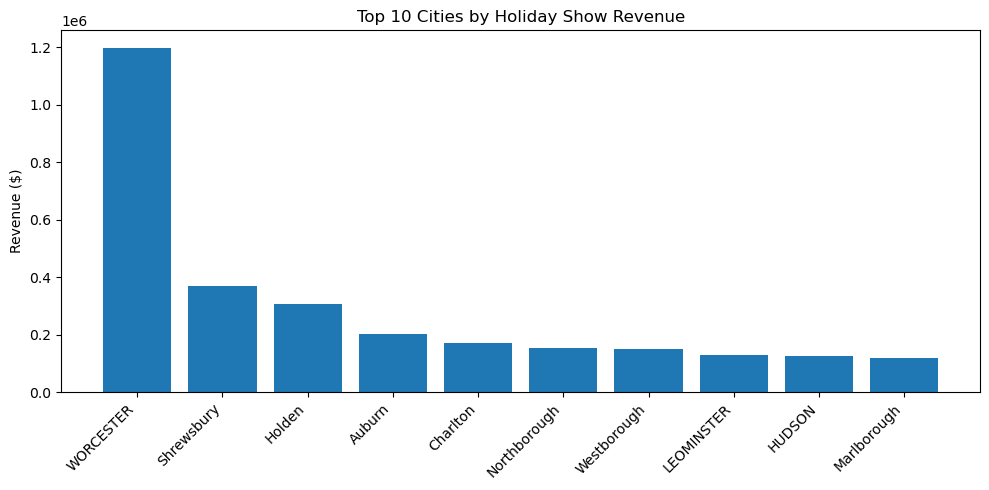

In [39]:
# Top 10 cities by revenue
top_revenue = (
    holiday.groupby("City")["Revenue"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10,5))
plt.bar(top_revenue.index.astype(str), top_revenue.values)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Revenue ($)")
plt.title("Top 10 Cities by Holiday Show Revenue")
plt.tight_layout()
plt.show()


In [40]:
import pandas as pd

df = pd.read_csv("C:\D Drive\Studies\Sem 4\Market Research and Analysis\Week 10\ACC Promotions All time.csv")
df.columns


<>:3: SyntaxWarning: invalid escape sequence '\D'
<>:3: SyntaxWarning: invalid escape sequence '\D'
C:\Users\karth\AppData\Local\Temp\ipykernel_876\2415725943.py:3: SyntaxWarning: invalid escape sequence '\D'
  df = pd.read_csv("C:\D Drive\Studies\Sem 4\Market Research and Analysis\Week 10\ACC Promotions All time.csv")


Index(['Event Series Name', 'Event Code', 'Event Start Date',
       'Price Type Name', 'Price Type Description',
       'Order Admission Promotion ID', 'COUNT Order Admission ID',
       'SUM Order Admission Amount', 'SUM Order Admission Net',
       'Promotion Promotion Code', 'Promotion Access Code',
       'Promotion Short Description', 'Promotion Description'],
      dtype='object')

                                     total_revenue  tickets
Promotion Short Description                                
Member                                    68768.75     1506
FSS Member                                43348.60     1090
Cheer                                     40867.10      806
A Christmas Carol cast offer              22909.00      770
A Christmas Carol promo                   19510.00      786
Broadway subscriber                       18184.25      364
Corporate Employee Discount Program       17610.40      450
Broadway Subscriber                       15891.80      276
Subscriber Discount                       15334.50      332
2223 Full Package Subscriber              15262.20      443


<>:5: SyntaxWarning: invalid escape sequence '\D'
<>:5: SyntaxWarning: invalid escape sequence '\D'
C:\Users\karth\AppData\Local\Temp\ipykernel_876\3122468684.py:5: SyntaxWarning: invalid escape sequence '\D'
  promos = pd.read_csv("C:\D Drive\Studies\Sem 4\Market Research and Analysis\Week 10\ACC Promotions All time.csv")


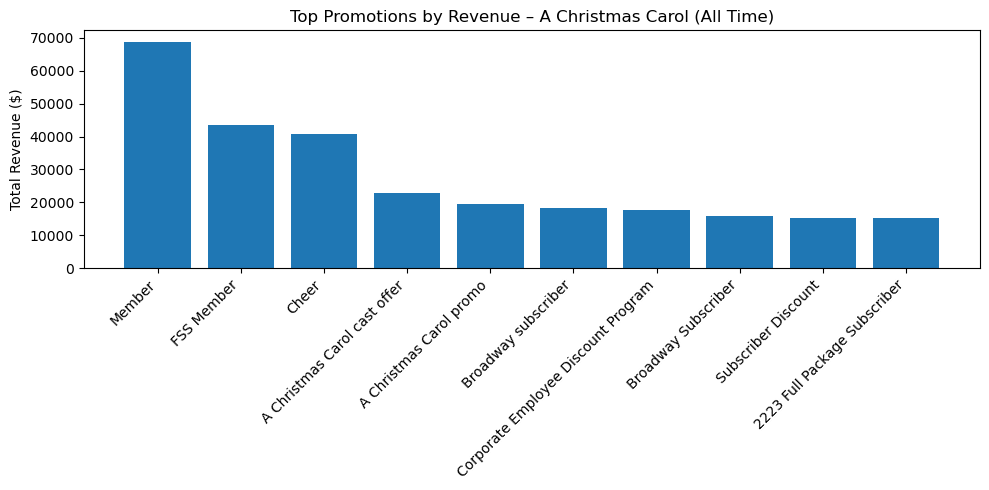

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load the data
promos = pd.read_csv("C:\D Drive\Studies\Sem 4\Market Research and Analysis\Week 10\ACC Promotions All time.csv")

# 2. Filter ONLY A Christmas Carol rows
# (Adjust this string if your Event Series Name is slightly different, e.g. "A Christmas Carol 2023-2024")
acc_promos = promos[promos["Event Series Name"].str.contains("Christmas Carol", case=False, na=False)]

# 3. Keep only rows that actually have a promotion (exclude blanks)
acc_promos_nonnull = acc_promos.dropna(subset=["Promotion Short Description"])

# 4. Group by promotion and summarize revenue + tickets
promo_summary = (
    acc_promos_nonnull
    .groupby("Promotion Short Description")
    .agg(
        total_revenue=("SUM Order Admission Net", "sum"),
        tickets=("COUNT Order Admission ID", "sum")
    )
    .sort_values("total_revenue", ascending=False)
)

# 5. Look at the top 10 promotions
top_promos = promo_summary.head(10)
print(top_promos)

# 6. Plot top promotions by revenue
plt.figure(figsize=(10, 5))
plt.bar(top_promos.index.astype(str), top_promos["total_revenue"])
plt.xticks(rotation=45, ha="right")
plt.ylabel("Total Revenue ($)")
plt.title("Top Promotions by Revenue – A Christmas Carol (All Time)")
plt.tight_layout()
plt.show()
